In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train = pd.read_csv('titanic_train.csv')

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


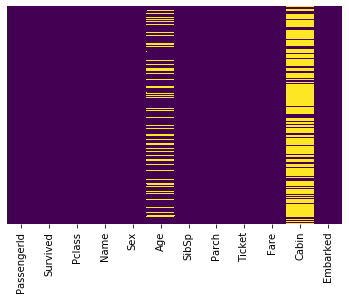

In [5]:
# Check how many missing data exist
# Missing data is plot as yellow bar
sns.heatmap(train.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [6]:
sns.set_style('whitegrid')

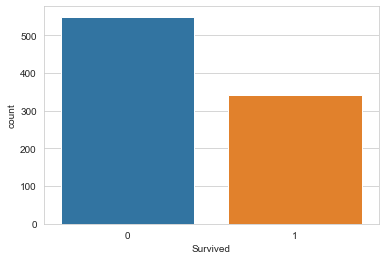

In [7]:
sns.countplot(x='Survived', data=train)

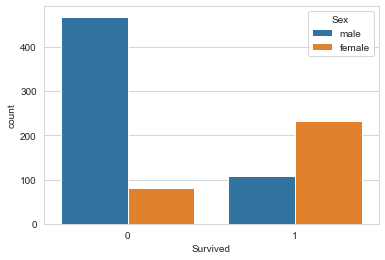

In [8]:
sns.countplot(x='Survived', data=train, hue='Sex')

# male survived more than female

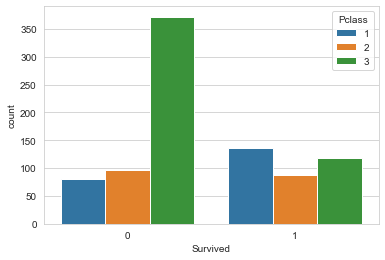

In [9]:
sns.countplot(x='Survived', data=train, hue='Pclass')

# higher class passanger survived more than lower class

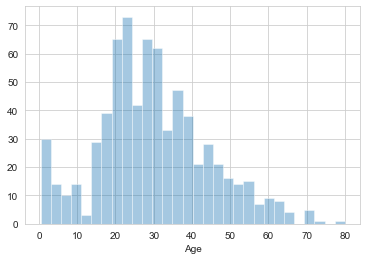

In [11]:
sns.distplot(train['Age'].dropna(), kde=False, bins=30)

In [12]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


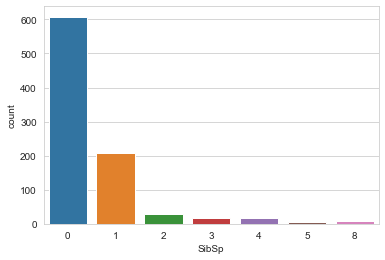

In [13]:
sns.countplot(x='SibSp', data=train)

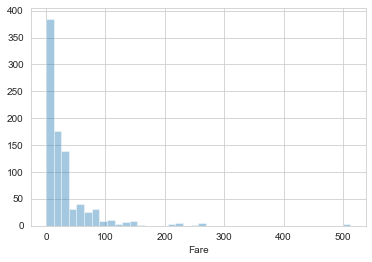

In [14]:
sns.distplot(train['Fare'], kde=False, bins=40)

# How to deal with missing data

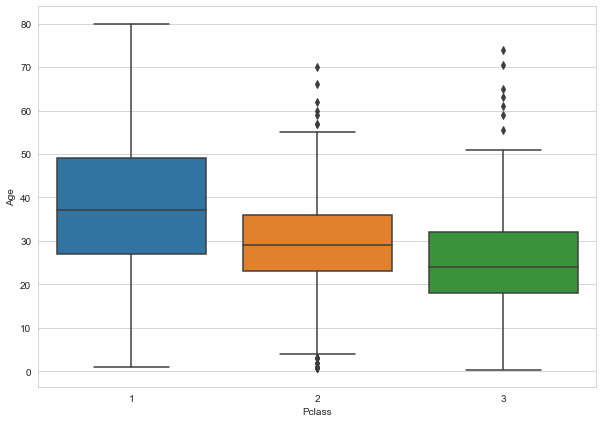

In [18]:
# To fill Age column missing data, visualize with box plot
# From the visualization, higher passenger class has higher average age
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass', y='Age', data=train)

In [19]:
def impute_age(cols):
    age = cols[0]
    p_class = cols[1]
    
    if pd.isnull(age):
        if p_class == 1:
            return 37
        elif p_class == 2:
            return 29
        else:
            return 24
    else:
        return age

In [20]:
train['Age'] = train[['Age', 'Pclass']].apply(impute_age, axis=1)

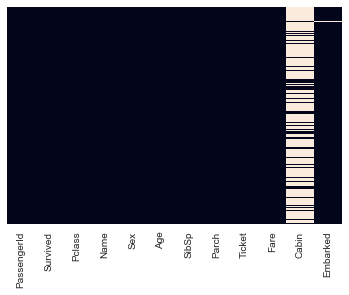

In [21]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [22]:
# Drop Cabin column from the dataset
train.drop('Cabin', axis=1, inplace=True)

In [24]:
# Drop row which has missing value from the dataset
train.dropna(inplace=True)

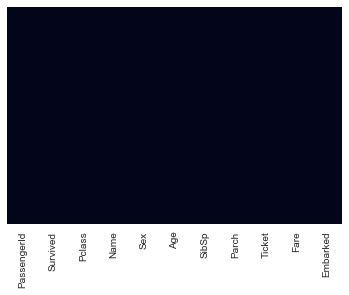

In [25]:
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [27]:
sex = pd.get_dummies(train['Sex'], drop_first=True)

In [28]:
embark = pd.get_dummies(train['Embarked'], drop_first=True)

In [29]:
train = pd.concat([train, sex, embark], axis=1)

In [30]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [31]:
# drop unused columns
train.drop(['Sex', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)

In [33]:
train.drop(['PassengerId'], axis=1, inplace=True)

In [34]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


# Build a Logistic Regression model

In [35]:
X = train.drop('Survived', axis=1)
y = train['Survived']

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=101)

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
logmodel = LogisticRegression()

In [40]:
logmodel.fit(X_train, y_train)

/Users/haraatsushi/.anyenv/envs/pyenv/versions/anaconda3-2020.02/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
predictions = logmodel.predict(X_test)

In [42]:
from sklearn.metrics import classification_report

In [47]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       163
           1       0.82      0.71      0.76       104

    accuracy                           0.83       267
   macro avg       0.83      0.81      0.81       267
weighted avg       0.83      0.83      0.83       267



In [44]:
from sklearn.metrics import confusion_matrix

In [45]:
confusion_matrix(y_test, predictions)

array([[147,  16],
       [ 30,  74]])